## california housing 

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

### import data set  form sklearn

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
california_housing = fetch_california_housing()

### split data for train and test

In [5]:
from sklearn.model_selection import train_test_split 
X_train0, X_test, y_train0, y_test = train_test_split(california_housing['data'], california_housing['target'])

In [6]:
# split data train for validation module and train module
X_train1, X_validation , y_train1, y_validation = train_test_split(X_train0, y_train0)

### normalizing data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s =sc.fit_transform(X_train1)
X_validation_s = sc.fit_transform(X_validation)
X_test_s = sc.fit_transform(X_test)

## neural network model

In [8]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1)
])

In [9]:
model.compile(
    loss='mean_squared_error',
    optimizer='sgd',
    metrics=['mean_absolute_error']
)

In [10]:
history = model.fit(X_train_s, y_train1, epochs=50, 
         validation_data=(X_validation_s, y_validation))

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 1.1411 - mean_absolute_error: 0.7394 - val_loss: 0.5338 - val_mean_absolute_error: 0.5115
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.4331 - mean_absolute_error: 0.4698 - val_loss: 0.5572 - val_mean_absolute_error: 0.4857
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.3933 - mean_absolute_error: 0.4396 - val_loss: 0.4653 - val_mean_absolute_error: 0.4736
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.3609 - mean_absolute_error: 0.4276 - val_loss: 0.4571 - val_mean_absolute_error: 0.4672
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.3449 - mean_absolute_error: 0.4115 - val_loss: 0.4621 - val_mean_absolute_error: 0.4622
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.3521 - mean_absolute_error: 0.4162 - val_loss: 0.4629 - val_mean_absolute_error: 0.4586
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.3258 - mean_absolute_err

In [11]:
scr = model.evaluate(X_test_s, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.4117 - mean_absolute_error: 0.4399


In [12]:
scr

[0.40895792841911316, 0.44111764430999756]

In [13]:
from matplotlib import pyplot as plt

In [19]:
history.history

{'loss': [0.6703299283981323,
  0.4119887053966522,
  0.37945443391799927,
  0.3585539162158966,
  0.34772029519081116,
  0.341977596282959,
  0.336597740650177,
  0.3319505751132965,
  0.32990553975105286,
  0.32737451791763306,
  0.3243844509124756,
  0.3277745246887207,
  0.32075178623199463,
  0.3231467008590698,
  0.314016729593277,
  0.30828526616096497,
  0.30540668964385986,
  0.30397409200668335,
  0.30113720893859863,
  0.30195239186286926,
  0.29821887612342834,
  0.29604169726371765,
  0.29428210854530334,
  0.2913477420806885,
  0.29029417037963867,
  0.29115718603134155,
  0.2887265384197235,
  0.2867121994495392,
  0.28874966502189636,
  0.2837710976600647,
  0.2834895849227905,
  0.2814919650554657,
  0.2813687026500702,
  0.2801567614078522,
  0.27939483523368835,
  0.2781469523906708,
  0.27702808380126953,
  0.2793729901313782,
  0.2767370939254761,
  0.2756355106830597,
  0.2743299603462219,
  0.27207261323928833,
  0.2723228931427002,
  0.27194270491600037,
  0.270

## plot errors and loss

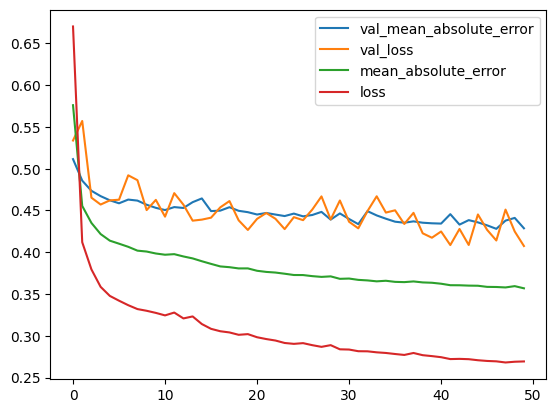

In [17]:
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['loss'], label='loss')
plt.legend()